# DM-VTON: Distilled Mobile Real-time Virtual Try-On


In [ ]:
!nvidia-smi

Fri May  3 06:13:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 0. Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Clone code and install
!git clone https://github.com/KiseKloset/DM-VTON.git
%cd DM-VTON

Cloning into 'DM-VTON'...
remote: Enumerating objects: 1679, done.
remote: Counting objects: 100% (544/544), done.
remote: Compressing objects: 100% (389/389), done.
remote: Total 1679 (delta 162), reused 333 (delta 144), pack-reused 1135
Receiving objects: 100% (1679/1679), 12.14 MiB | 17.03 MiB/s, done.
Resolving deltas: 100% (662/662), done.
Updating files: 100% (433/433), done.
/content/drive/MyDrive/Colab Notebooks/DM-VTON


In [ ]:
%cd DM-VTON

/content/drive/MyDrive/Colab Notebooks/DM-VTON


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 31.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manyli

In [ ]:
!pip uninstall cupy-cuda11x

In [ ]:
# Download VITON-Clean dataset
!mkdir ../dataset
!gdown 1-5FtBJtel-ujgKR_TqJEcN2KrhyjBcyp -O ../dataset/VITON-Clean.zip
!unzip ../dataset/VITON-Clean.zip -d ../dataset
!rm ../dataset/VITON-Clean.zip

Streaming output truncated to the last 5000 lines.
  inflating: ../dataset/VITON-Clean/VITON_traindata/train_pose/002835_0.json  
  inflating: ../dataset/VITON-Clean/VITON_traindata/train_pose/002836_0.json  
  inflating: ../dataset/VITON-Clean/VITON_traindata/train_pose/002837_0.json  
  inflating: ../dataset/VITON-Clean/VITON_traindata/train_pose/002838_0.json  
  inflating: ../dataset/VITON-Clean/VITON_traindata/train_pose/002844_0.json  
  inflating: ../dataset/VITON-Clean/VITON_traindata/train_pose/002845_0.json  
  inflating: ../dataset/VITON-Clean/VITON_traindata/train_pose/002846_0.json  
  inflating: ../dataset/VITON-Clean/VITON_traindata/train_pose/002847_0.json  
  inflating: ../dataset/VITON-Clean/VITON_traindata/train_pose/002848_0.json  
  inflating: ../dataset/VITON-Clean/VITON_traindata/train_pose/002850_0.json  
  inflating: ../dataset/VITON-Clean/VITON_traindata/train_pose/002851_0.json  
  inflating: ../dataset/VITON-Clean/VITON_traindata/train_pose/002853_0.json  
 

## 1. Inference
`test.py` run inference on input images (person + garment) and generate 1 try-on image. The results will be saved at `ROJECT_DIR/results`.

In [ ]:
# Download checkpoints
!mkdir checkpoints
!gdown 16H16AhGJrqndDrAaHWZvTFzGSsaDecpS -O checkpoints/dmvton_pf_warp.pt
!gdown 1i-Ple5L9__LV_Fbx1cZyxiOC-CRFxi0C -O checkpoints/dmvton_pf_gen.pt

Downloading...
From (original): https://drive.google.com/uc?id=16H16AhGJrqndDrAaHWZvTFzGSsaDecpS
From (redirected): https://drive.google.com/uc?id=16H16AhGJrqndDrAaHWZvTFzGSsaDecpS&confirm=t&uuid=a45d1d5c-b32d-432b-bcc0-00a48c122386
To: /content/drive/MyDrive/Colab Notebooks/DM-VTON/checkpoints/dmvton_pf_warp.pt
100% 86.5M/86.5M [00:03<00:00, 23.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1i-Ple5L9__LV_Fbx1cZyxiOC-CRFxi0C
From (redirected): https://drive.google.com/uc?id=1i-Ple5L9__LV_Fbx1cZyxiOC-CRFxi0C&confirm=t&uuid=456fb4c6-63c5-44dc-baae-43b541bf7577
To: /content/drive/MyDrive/Colab Notebooks/DM-VTON/checkpoints/dmvton_pf_gen.pt
100% 26.4M/26.4M [00:00<00:00, 32.5MB/s]


In [ ]:
!ls

checkpoints  LICENSE  opt	 requirements.txt  setup.cfg	    train_pb_warp.py  utils
dataloader   losses   pipelines  runs		   test.py	    train_pf_e2e.py   val.py
exp	     models   README.md  scripts	   train_pb_e2e.py  train_pf_warp.py  visualize.py


In [ ]:
# Set batch_size = 1 to save each image separately
!python test.py --project runs/test --name DM-VTON_demo \
--device 0 --align_corners --batch_size 1 --workers 16 \
--dataroot ../dataset/VITON-Clean/VITON_test \
--pf_warp_checkpoint checkpoints/dmvton_pf_warp.pt \
--pf_gen_checkpoint checkpoints/dmvton_pf_gen.pt

Load pretrained parser-free warp from checkpoints/dmvton_pf_warp.pt
Load pretrained parser-free gen from checkpoints/dmvton_pf_gen.pt
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:3782: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.10/dist-packages/cupy/cuda/compiler.py:464: UserWarning: cupy.cuda.compile_with_cache has been deprecated in CuP

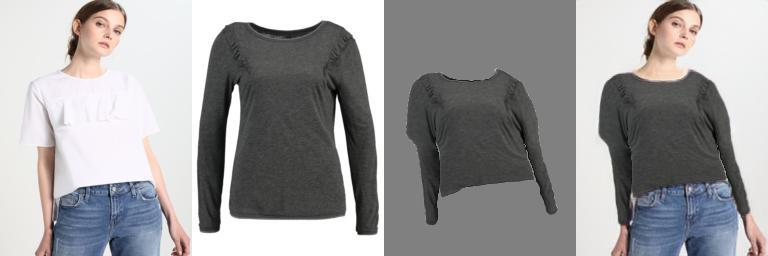

In [ ]:
from IPython.display import Image
Image(filename='runs/test/DM-VTON_demo-1/results/visualize/000696_0.jpg')

## 2. Train

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs/train/

### Train Teacher Network
Train a parser-based virtual try-on network that will be used as a Teacher
- Stage 1: Train the Teacher warping module
- Stage 2: Train all the Teacher network (warping module + generator)

In [ ]:
# Stage 1: Train the Teacher warping module
!python train_pb_warp.py --project runs/train/DM-VTON_demo --name Teacher_warp \
--device 0 --align_corners --batch_size 18 --workers 16 --lr 0.00005 \
--niter 1 --niter_decay 1 --save_period 1 \
--print_step 200 --sample_step 1000 \
--dataroot ../dataset/VITON-Clean/VITON_traindata

In [ ]:
# Stage 2: Train all the Teacher network (warping module + generator)
!python train_pb_e2e.py --project runs/train/DM-VTON_demo --name Teacher_e2e \
--device 0 --align_corners --batch_size 14 --workers 16 --lr 0.00005 \
--niter 1 --niter_decay 1 --save_period 1 \
--print_step 200 --sample_step 1000 \
--dataroot ../dataset/VITON-Clean/VITON_traindata \
--pb_warp_checkpoint runs/train/DM-VTON_demo/Teacher_warp/weights/pb_warp_last.pt

### Train Student Network
Train a parser-free virtual try-on network that will be used to run inference
- Stage 1: Train the Student warping module
- Stage 2: Train all the Student network (warping module + generator)

In [ ]:
# Stage 1: Train the Student warping module
!python train_pf_warp.py --project runs/train/DM-VTON_demo --name Student_warp \
--device 0 --align_corners --batch_size 8 --workers 16 --lr 0.00005 \
--niter 1 --niter_decay 1 --save_period 1 \
--print_step 200 --sample_step 1000 \
--dataroot ../dataset/VITON-Clean/VITON_traindata \
--pb_warp_checkpoint runs/train/DM-VTON_demo/Teacher_e2e/weights/pb_warp_last.pt \
--pb_gen_checkpoint runs/train/DM-VTON_demo/Teacher_e2e/weights/pb_gen_last.pt

In [ ]:
# Stage 2: Train all the Student network (warping module + generator)
!python train_pf_e2e.py --project runs/train/DM-VTON_demo --name Student_e2e \
--device 0 --align_corners --batch_size 6 --workers 16 --lr 0.00005 \
--niter 1 --niter_decay 1 --save_period 1 \
--print_step 200 --sample_step 1000 \
--dataroot ../dataset/VITON-Clean/VITON_traindata \
--valroot ../dataset/VITON-Clean/VITON_test \
--pb_warp_checkpoint runs/train/DM-VTON_demo/Teacher_e2e/weights/pb_warp_last.pt \
--pb_gen_checkpoint runs/train/DM-VTON_demo/Teacher_e2e/weights/pb_gen_last.pt \
--pf_warp_checkpoint runs/train/DM-VTON_demo/Student_warp/weights/pf_warp_last.pt